In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

figdir = "figures"
if not os.path.exists(figdir):
    os.makedirs(figdir)

def savefig(fname):
    plt.savefig(os.path.join(figdir, fname))

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

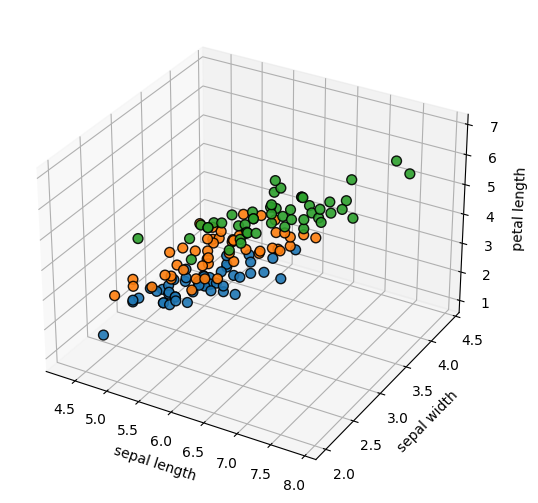

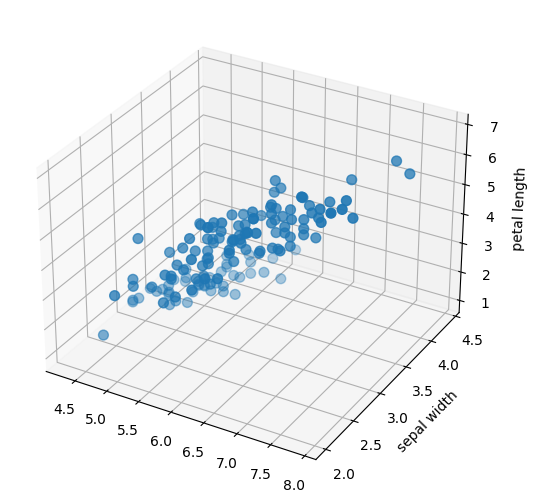

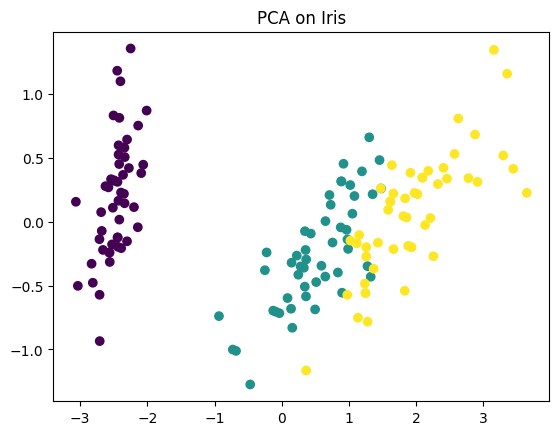

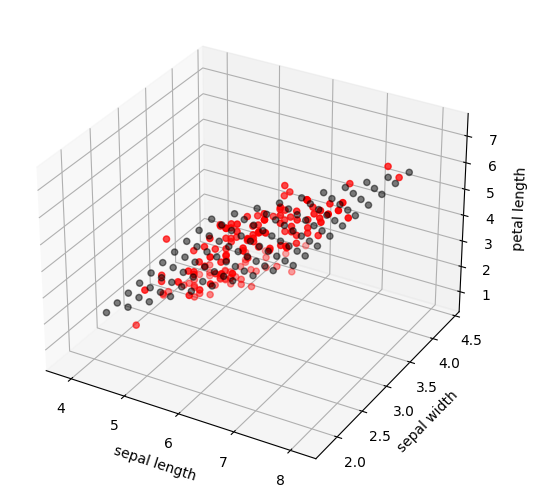

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

# fig = plt.figure().gca(projection="3d")
fig= plt.figure()
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)


colors = ["green", "blue", "red"]
for c in range(3):
    x0 = X[y == c, 0]
    x1 = X[y == c, 1]
    x2 = X[y == c, 2]
    ax.scatter(x0, x1, x2, colors[c], edgecolors="k", s=50, alpha=0.9, marker="o", label=iris.target_names[c])
ax.set_xlabel("sepal length")
ax.set_ylabel("sepal width")
ax.set_zlabel("petal length")
# plt.legend()
savefig("iris-3dscatterplot")
plt.show()


# fig = plt.figure().gca(projection="3d")
fig= plt.figure()
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=50, marker="o")
ax.set_ylabel("sepal width")
ax.set_zlabel("petal length")
savefig("iris-3dscatterplot-nocolor")
plt.show()

# 2d projection of points
X = iris.data[:, 0:3]
pca_xy = PCA(n_components=2).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(pca_xy[:, 0], pca_xy[:, 1], c=y)
ax.set_title("PCA on Iris")
savefig("iris-pca")
plt.show()


# plot 3d reconstructed planar surface
pca = PCA(n_components=2)
mu = np.mean(X, axis=0)
Xc = X - mu  # center the data
pca.fit(Xc)
W = pca.components_.T  # D*K
Z = np.dot(Xc, W)  # N * K latent scores
Xrecon = np.dot(Z, W.T) + mu  # N*D

# span the latent space in area covered by data
a = np.min(Z[:, 0])
b = np.max(Z[:, 0])
c = np.min(Z[:, 1])
d = np.max(Z[:, 1])
z0 = np.linspace(a, b, 10)
z1 = np.linspace(c, d, 10)
ZZ0, ZZ1 = np.meshgrid(z0, z1)
Zgrid = np.c_[ZZ0.ravel(), ZZ1.ravel()]  # 100x2
plane = np.dot(Zgrid, W.T) + mu  # N*D

latent_corners = np.array([[a, c], [a, d], [b, c], [b, d]])  # 4x2
recon_corners = np.dot(latent_corners, W.T) + mu  # 4x3

# fig = plt.figure().gca(projection="3d")
fig= plt.figure()
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
scatterplot = ax.scatter(X[:, 0], X[:, 1], X[:, 2], color="red")
lineplot = ax.scatter(plane[:, 0], plane[:, 1], plane[:, 2], color="black", alpha=0.5)
ax.set_xlabel("sepal length")
ax.set_ylabel("sepal width")
ax.set_zlabel("petal length")
savefig("iris-pca-3d")
plt.show()